In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [3]:
def setParameters(X,Y,hidden_size):
    np.random.seed(3)
    
    #number of neurons in input layer
    input_size = X.shape[0]
    
    #number of neurons in output layer
    output_size = Y.shape[0]
    
    W1 = np.random.randn(hidden_size, input_size)* np.sqrt(2/input_size)
    b1 = np.zeros((hidden_size,1))

    W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/input_size)
    b2 = np.zeros((output_size,1))
    
    return {'W1':W1, 'W2':W2, 'b1':b1, 'b2':b2}

    

Forward Propagation

In [4]:
def forwardPropagation(X, params):
    Z1 = np.dot(params['W1'], X) + params['b1']
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(params['W2'], A1) + params['b2']
    y = sigmoid(Z2)
    
    return(y,{'Z1':Z1, 'Z2':Z2, 'A1':A1, 'y':y})

Cost Function

In [5]:
def cost(predict, actual):
    m = actual.shape[1]
    cost_ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1-actual),np.log(1-predict)))
    return(np.squeeze(cost_))

Backpropagation

In [6]:
def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    
    dw2 = (1/m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1/m) * np.sum(dy, axis=1, keepdims=True)
    
    dz1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
    dw1 = (1/m)*np.dot(dz1, np.transpose(X))
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)
    
    return {"dw1":dw1,"db1":db1, "dw2":dw2, "db2":db2}

UpdateParameter

In [7]:
def updateParameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dw1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dw2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1':W1, 'W2':W2, 'b1':b1, 'b2':b2}

Training

In [8]:
def fit(X, Y, learning_rate, hidden_size, number_iterate = 5000):
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    for j in range(number_iterate):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate)
        cost_.append(costit)
    return(params, cost_)

Adding Data

In [9]:
import sklearn.datasets

In [10]:
X, Y = sklearn.datasets.make_moons(n_samples = 500, noise=0.2)
print("{} {}".format(X.shape,Y.shape))

(500, 2) (500,)


In [11]:
X, Y = X.T, Y.reshape(1, Y.shape[0])
print("{} {}".format(X.shape,Y.shape))

(2, 500) (1, 500)


In [12]:
params, cost_ = fit(X, Y, 0.3, 5, 5000)

Plot graph showing the cost function change

In [13]:
import matplotlib.pyplot as plt

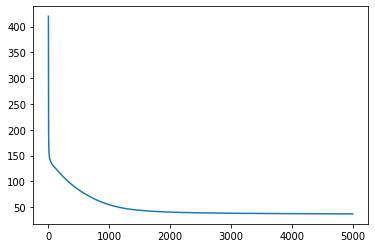

In [14]:
plt.plot(cost_)

In [15]:
cost_

[419.93529407517747,
 283.8045781273414,
 223.01416062267717,
 196.68550898985478,
 182.4767073784939,
 173.57799659630243,
 167.4787868443041,
 163.04160483374815,
 159.6722997961773,
 157.02840383958875,
 154.89803250416367,
 153.14297563231577,
 151.66932668823299,
 150.41118205172194,
 149.3210576376272,
 148.36398602509303,
 147.51373842331748,
 146.7503277371021,
 146.05831275422653,
 145.42561915458975,
 144.8427030192462,
 144.30194670337542,
 143.7972156434334,
 143.32352868840343,
 142.87680983307317,
 142.45369918378364,
 142.0514075987727,
 141.66760391868326,
 141.30032678036426,
 140.9479151568301,
 140.60895328904422,
 140.28222676790938,
 139.96668731837076,
 139.661424420218,
 139.3656423324516,
 139.07864141187764,
 138.79980286130078,
 138.5285762291624,
 138.2644691256748,
 138.00703873126133,
 137.75588475934993,
 137.51064360311815,
 137.27098344900406,
 137.03660018192988,
 136.80721394070423,
 136.58256620884313,
 136.3624173475219,
 136.14654449464433,
 135.934

In [16]:
X.shape

(2, 500)